# Convolutional Neural Networks

In [48]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import matplotlib.pyplot as plt

2.0.0


In [49]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images / 255.
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.
model = keras.models.Sequential([keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                                 keras.layers.MaxPooling2D(2, 2),
                                 keras.layers.Conv2D(32, (3, 3), activation='relu'),
                                 keras.layers.MaxPooling2D(2, 2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')
                                ])
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
              )
model.summary()
model.fit(train_images, train_labels, epochs=10)
model.evaluate(test_images, test_labels, verbose=0)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_25 (Dense)             (None, 10)              

[0.2833975530028343, 0.9053]

In [50]:
test_labels[:100]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2], dtype=uint8)

1 1 1


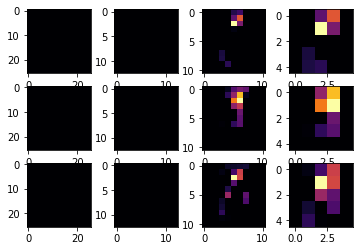

In [51]:
FIRST=2
SECOND=3
THIRD=5
CONVOLUTION_NUMBER = 0
print(test_labels[FIRST], test_labels[SECOND], test_labels[THIRD])
f, axarr = plt.subplots(3, 4)

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(4):
    f1 = activation_model.predict(test_images[FIRST].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)